In [166]:
import random
#import numpy as np
import networkx as nx

In [142]:
def generate_transtions_v0 (num_nodes , num_attractors):
    n = num_nodes
    s = 2**n # number of states
    r = num_attractors

    num_att = 0
    while num_att != r:
        edgelist = [(i,random.randint(0, s-1)) for i in range(s)]
        G = nx.from_edgelist(edgelist)
        num_att = nx.number_connected_components(G)
    
    sizes = [len(B) for B in sorted(nx.connected_components(G), key=len, reverse=True)]

    return sizes, edgelist

In [143]:
basin_sizes, transitions = generate_transtions (num_nodes = 10 , num_attractors = 10)

In [144]:
basin_sizes

[441, 339, 125, 57, 40, 11, 5, 2, 2, 2]

In [145]:
import random

In [153]:
def transitions_between_layers(inner_layer,outher_layer):
    """
    Generate transitions from the outher to the inner layer.
    The inputs are lists of states in the two layers
    """
    edges = []
    for i in outher_layer:
        random.shuffle(inner_layer)
        j = inner_layer[0]
        edges.append((i,j))
    return edges

In [158]:
def core_transitions(length):
    """
    Given the length of the cycle,
    generate its associated transitions.
    These states take labels 0, 1, ..., length 
    """
    return [(i, (i+1)%length) for i in range(length)]

In [203]:
def layer_distribution(length, num_states):
    """
    Generate the distribution of the number of states,
    [n1,n2,n3,...]
    where n1 is the number of states in the innermost layer (i.e. the cycle),
    n2 is the number of states in layer 2, etc.
    """
    layer_widths = [length]
    while sum(layer_widths) < num_states:
        assigned_states = sum(layer_widths)
        m = random.randint(1,num_states-assigned_states)
        layer_widths.append(m)
    return layer_widths

In [240]:
length = 3
num_states = 100

# generate the distribution of states
dist = layer_distribution(length, num_states)

edges = core_transitions(length)

In [241]:
dist

[3, 28, 13, 4, 40, 2, 6, 2, 1, 1]

In [242]:
layer_id = 2

start = sum(dist[:layer_id])
stop  = sum(dist[:layer_id]) + dist[layer_id]

list(range(start, stop))

[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

In [248]:
len(dist)

10

In [251]:
# generate the distribution of states
dist = layer_distribution(length, num_states)

edges = core_transitions(length)

for i in range(len(dist)-1):
    
    # outher_layer
    layer_id = i+1
    start = sum(dist[:layer_id])
    stop  = sum(dist[:layer_id]) + dist[layer_id]
    outher_layer = list(range(start, stop))
    
    # inner_layer
    layer_id = i
    start = sum(dist[:layer_id])
    stop  = sum(dist[:layer_id]) + dist[layer_id]
    inner_layer = list(range(start, stop))
    
    edges = edges + transitions_between_layers(inner_layer,outher_layer)
    

edges

[(0, 1),
 (1, 2),
 (2, 0),
 (3, 0),
 (4, 2),
 (5, 1),
 (6, 0),
 (7, 2),
 (8, 0),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 2),
 (13, 2),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 1),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 1),
 (26, 2),
 (27, 2),
 (28, 2),
 (29, 0),
 (30, 0),
 (31, 0),
 (32, 14),
 (33, 27),
 (34, 13),
 (35, 9),
 (36, 14),
 (37, 23),
 (38, 22),
 (39, 23),
 (40, 18),
 (41, 5),
 (42, 9),
 (43, 29),
 (44, 21),
 (45, 15),
 (46, 10),
 (47, 5),
 (48, 20),
 (49, 22),
 (50, 27),
 (51, 9),
 (52, 9),
 (53, 20),
 (54, 19),
 (55, 12),
 (56, 13),
 (57, 4),
 (58, 25),
 (59, 11),
 (60, 23),
 (61, 18),
 (62, 15),
 (63, 5),
 (64, 10),
 (65, 20),
 (66, 31),
 (67, 31),
 (68, 5),
 (69, 21),
 (70, 4),
 (71, 25),
 (72, 10),
 (73, 9),
 (74, 24),
 (75, 5),
 (76, 14),
 (77, 4),
 (78, 11),
 (79, 10),
 (80, 6),
 (81, 24),
 (82, 30),
 (83, 30),
 (84, 8),
 (85, 17),
 (86, 25),
 (87, 12),
 (88, 15),
 (89, 27),
 (90, 16),
 (91, 8),
 (92, 10),
 (93, 18),
 (94, 52),
 (95, 76),
 (

In [255]:
G = nx.from_edgelist(edges)
pos = nx.spring_layout(G)

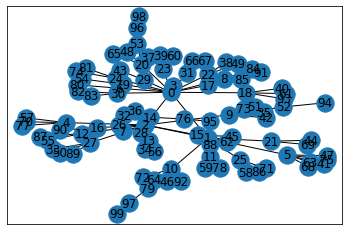

In [258]:
nx.draw_networkx(G, pos)

In [260]:
G = nx.from_edgelist(edges)
num_att = nx.number_connected_components(G)

In [261]:
num_att

1

In [ ]:
# To do:
# Now I need to separate the larger transition graph into connected components generated this way
# and relabel everything accordingly